<a href="https://colab.research.google.com/github/Kalash432/AspireNex/blob/main/Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Load the dataset
file_path = '/content/WA_Fn-UseC_-Telco-Customer-Churn.csv'
data = pd.read_csv(file_path)

In [34]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [36]:
# Convert TotalCharges to numeric, coerce errors to NaN to handle non-numeric values
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

In [40]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2281.916928
std,0.368612,24.559481,30.090047,2265.270398
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [37]:
# Fill missing TotalCharges values with the median
data['TotalCharges'].fillna(data['TotalCharges'].median(), inplace=True)

In [39]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
def plot_distribution(feature):
    plt.figure(figsize=(10, 5))
    sns.histplot(data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

In [10]:
def plot_correlation_heatmap():
    plt.figure(figsize=(20, 10))
    numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
    sns.heatmap(data[numeric_columns].corr(), annot=True, fmt=".2f")
    plt.title('Correlation Heatmap')
    plt.show()

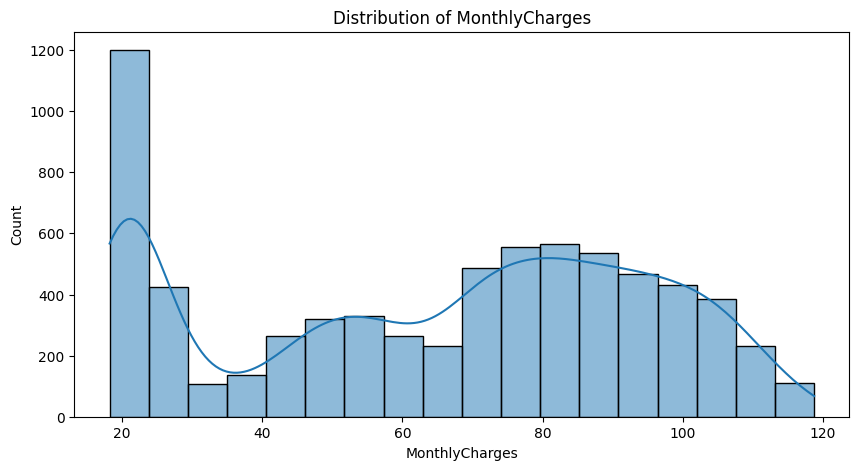

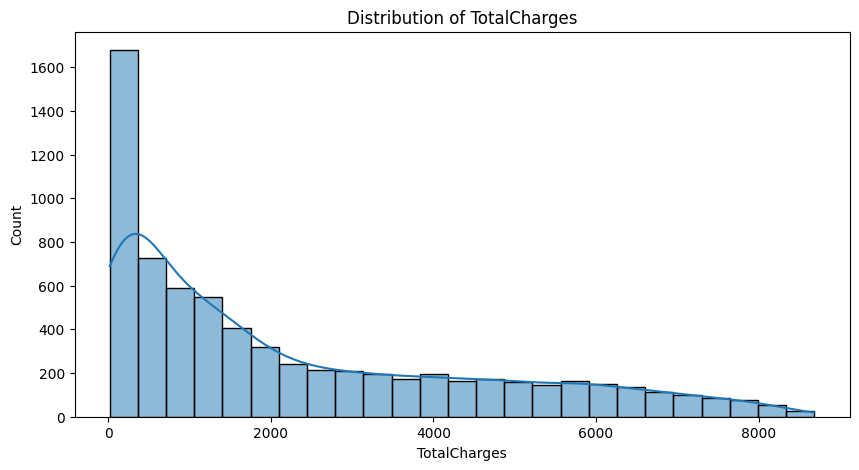

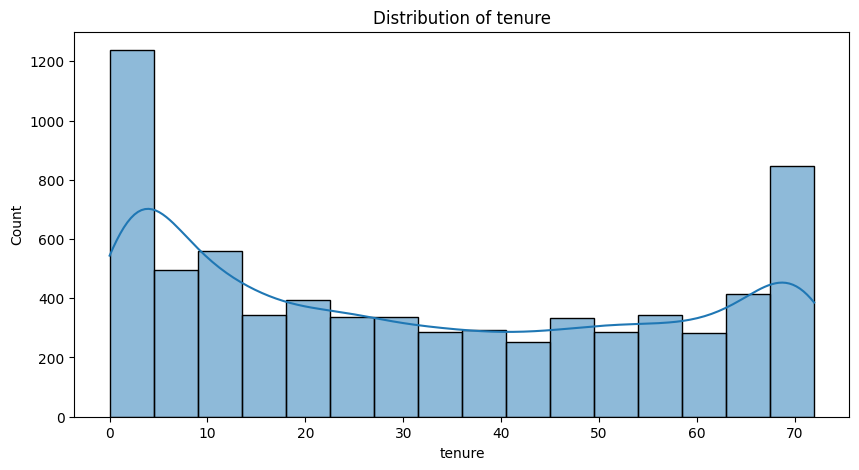

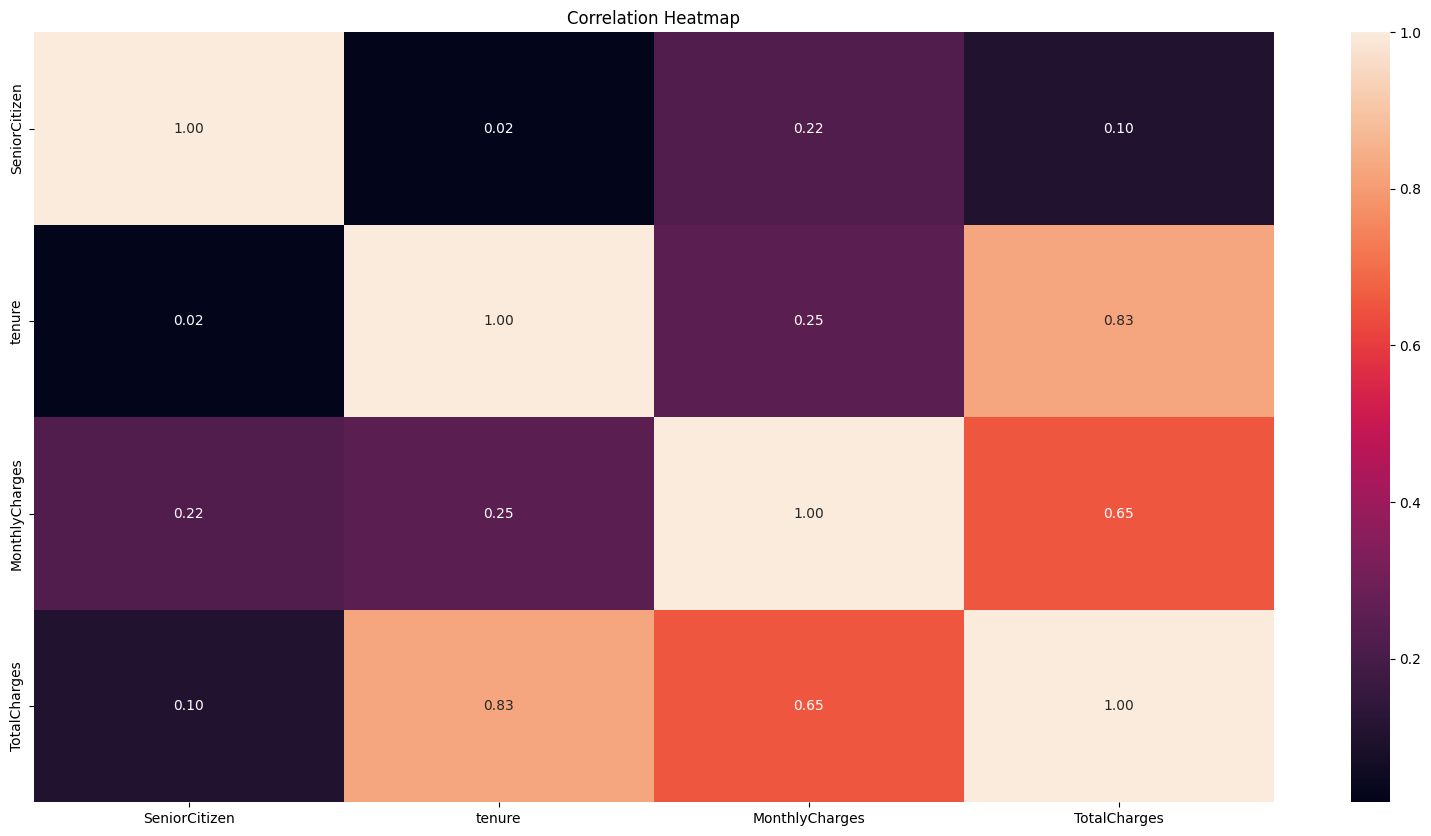

In [11]:
plot_distribution('MonthlyCharges')
plot_distribution('TotalCharges')
plot_distribution('tenure')
plot_correlation_heatmap()

In [12]:
# Encode categorical variables using one-hot encoding
categorical_columns = [
    'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
    'PaperlessBilling', 'PaymentMethod'
]

In [13]:
data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

In [14]:
# Encode the target variable 'Churn'
data_encoded['Churn'] = data_encoded['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

In [15]:
# Split the data into features and target
X = data_encoded.drop(columns=['customerID', 'Churn'])
y = data_encoded['Churn']

In [16]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Initialize the models
log_reg = LogisticRegression(max_iter=1000, random_state=42)
random_forest = RandomForestClassifier(random_state=42)
gradient_boosting = GradientBoostingClassifier(random_state=42)


In [26]:
#Hyperparameters tuning with Grid Search
param_grid_log_reg = {
    'C': [0.1, 1, 10]
}
param_grid_random_forest = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20]
}
param_grid_gradient_boosting = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2]
}

In [27]:
log_reg_grid = GridSearchCV(log_reg, param_grid_log_reg, cv=5, scoring='roc_auc')
random_forest_grid = GridSearchCV(random_forest, param_grid_random_forest, cv=5, scoring='roc_auc')
gradient_boosting_grid = GridSearchCV(gradient_boosting, param_grid_gradient_boosting, cv=5, scoring='roc_auc')

In [18]:
param_grid = {
    'log_reg': {
        'C': [0.1, 1, 10]
    },
    'random_forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20]
    },
    'gradient_boosting': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2]
    }
}
log_reg_grid = GridSearchCV(log_reg, param_grid['log_reg'], cv=5, scoring='roc_auc')
random_forest_grid = GridSearchCV(random_forest, param_grid['random_forest'], cv=5, scoring='roc_auc')
gradient_boosting_grid = GridSearchCV(gradient_boosting, param_grid['gradient_boosting'], cv=5, scoring='roc_auc')

In [19]:
# Train the models
log_reg.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
gradient_boosting.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [33]:
print("Random Forest best estimator:", random_forest_grid.best_estimator_)
print("Random Forest best params:", random_forest_grid.best_params_)

Random Forest best estimator: RandomForestClassifier(max_depth=10, n_estimators=200, random_state=42)
Random Forest best params: {'max_depth': 10, 'n_estimators': 200}


In [29]:
# Predict on the test set
log_reg_preds = log_reg.predict(X_test)
random_forest_preds = random_forest.predict(X_test)
gradient_boosting_preds = gradient_boosting.predict(X_test)

In [21]:
# Evaluate the models
def evaluate_model(y_true, y_pred):
    return {
        'accuracy': accuracy_score(y_true, y_pred),
        'precision': precision_score(y_true, y_pred),
        'recall': recall_score(y_true, y_pred),
        'f1_score': f1_score(y_true, y_pred),
        'roc_auc': roc_auc_score(y_true, y_pred)
    }

In [22]:
log_reg_metrics = evaluate_model(y_test, log_reg_preds)
random_forest_metrics = evaluate_model(y_test, random_forest_preds)
gradient_boosting_metrics = evaluate_model(y_test, gradient_boosting_preds)

In [23]:
print("Logistic Regression Metrics:", log_reg_metrics)
print("Random Forest Metrics:", random_forest_metrics)
print("Gradient Boosting Metrics:", gradient_boosting_metrics)

Logistic Regression Metrics: {'accuracy': 0.8183108587650816, 'precision': 0.6833855799373041, 'recall': 0.5844504021447721, 'f1_score': 0.630057803468208, 'roc_auc': 0.7434800273272123}
Random Forest Metrics: {'accuracy': 0.7892122072391767, 'precision': 0.6428571428571429, 'recall': 0.4584450402144772, 'f1_score': 0.5352112676056339, 'roc_auc': 0.6833730992578178}
Gradient Boosting Metrics: {'accuracy': 0.8090844570617459, 'precision': 0.6721854304635762, 'recall': 0.5442359249329759, 'f1_score': 0.6014814814814815, 'roc_auc': 0.7243380396865653}


In [24]:
random_forest_grid = GridSearchCV(random_forest, param_grid, cv=5)

In [31]:
random_forest_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'n_estimators': [50, 100, 200]},
             scoring='roc_auc')

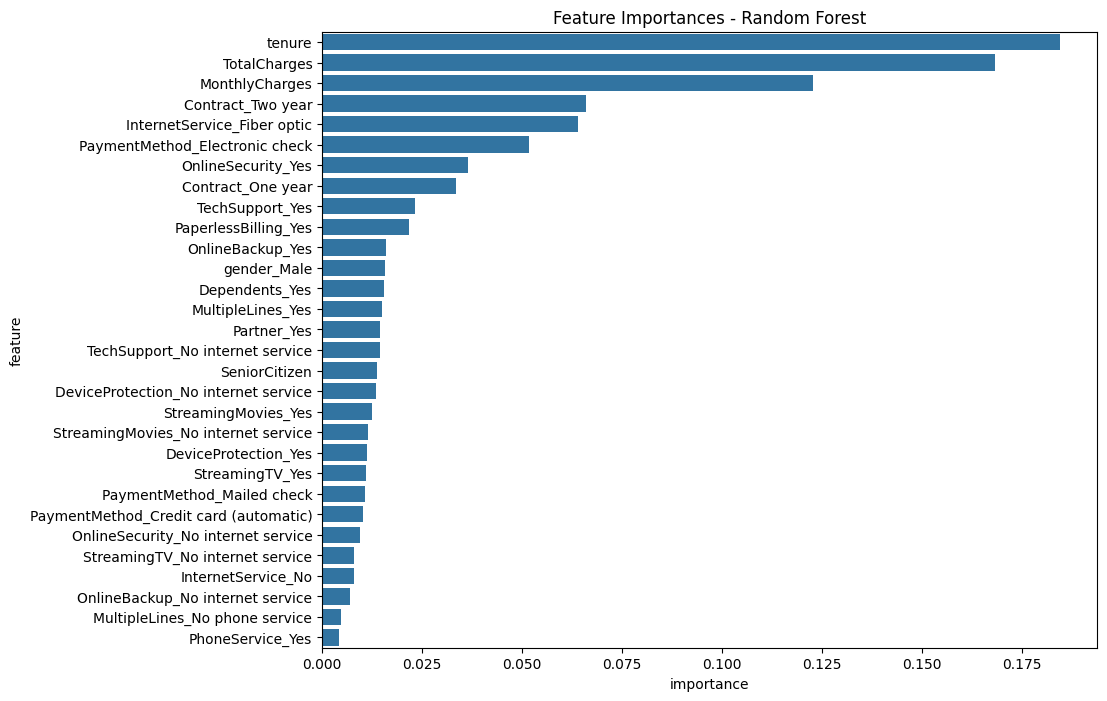

In [32]:
best_random_forest = random_forest_grid.best_estimator_
feature_importances = pd.DataFrame({
    'feature': X.columns,
    'importance': best_random_forest.feature_importances_
}).sort_values(by='importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=feature_importances)
plt.title('Feature Importances - Random Forest')
plt.show()